In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing & model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv("data.csv")

# Check first 5 rows
print(df.head())

# Check dataset info
print(df.info())

# Check missing values
print(df.isnull().sum())

# Drop unnecessary columns (like 'id' and 'Unnamed: 32')
df = df.drop(['id', 'Unnamed: 32'], axis=1)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
# Original labels: M (Malignant = High), B (Benign = Low)
df['diagnosis'] = df['diagnosis'].map({'M': 'High', 'B': 'Low'})

# (Optional) Introduce a "Medium" category for demonstration
# Here, we randomly assign some 'High' cases to 'Medium' for the task
import random
for i in range(len(df)):
    if df.loc[i, 'diagnosis'] == 'High' and random.random() < 0.3:  # 30% of High -> Medium
        df.loc[i, 'diagnosis'] = 'Medium'

print(df['diagnosis'].value_counts())

X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']               # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



diagnosis
Low       357
High      147
Medium     65
Name: count, dtype: int64


In [4]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.86
F1-Score: 0.83
              precision    recall  f1-score   support

        High       0.69      0.90      0.78        30
         Low       0.96      0.99      0.97        71
      Medium       0.50      0.08      0.13        13

    accuracy                           0.86       114
   macro avg       0.72      0.65      0.63       114
weighted avg       0.84      0.86      0.83       114



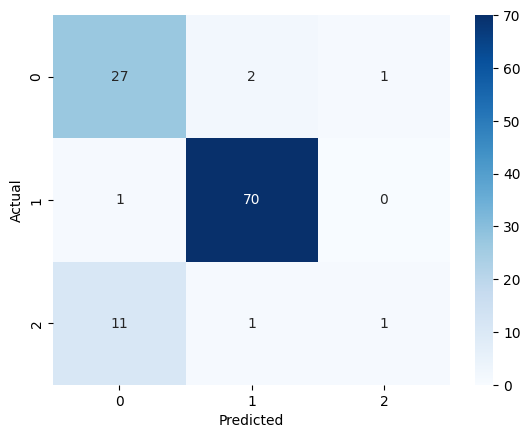

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.2f}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()